In [10]:
from hydra import initialize, compose
import json
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path
from itertools import product

In [4]:
with initialize(version_base=None, config_path="./conf/filepaths"):
    cfg = compose(config_name="filepaths")

In [5]:
with open(Path(cfg.raw_data) / "mcsa" / "entries_0.json", "r") as f:
    entries = json.load(f)

In [6]:
entries['49']['reaction']['compounds']

[{'count': 1,
  'type': 'product',
  'chebi_id': '16526',
  'name': 'carbon dioxide',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/16526.mol'},
 {'count': 1,
  'type': 'reactant',
  'chebi_id': '15378',
  'name': 'hydron',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/15378_Fxpq4oZ.mol'},
 {'count': 1,
  'type': 'product',
  'chebi_id': '58432',
  'name': 'histaminium',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/58432.mol'},
 {'count': 1,
  'type': 'reactant',
  'chebi_id': '57595',
  'name': 'L-histidine zwitterion',
  'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/57595.mol'}]

11


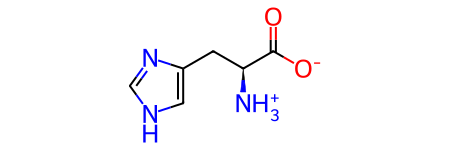

In [7]:
mol = Chem.MolFromMolFile(Path(cfg.raw_data) / "mcsa" / "mols" / "57595.mol", removeHs=False)
print(mol.GetNumAtoms())
mol

In [11]:
rcts = ['CC', 'O', 'CN']
rule = "[C:1]-[C:2].[O:3]>>[C:1]-[C:2]-[O:3]"
op = rdChemReactions.ReactionFromSmarts(rule)
rcts_mol = [Chem.MolFromSmiles(r) for r in rcts]
op.RunReactants(rcts_mol)

ValueError: ChemicalParserException: Number of reactants provided does not match number of reactant templates.

In [ ]:
lhs_patts = rule.split(">>")[0].split(".")
lhs_patts = [Chem.MolFromSmarts(p) for p in lhs_patts]
for rct, patt in product(rcts_mol, lhs_patts):
    if patt.HasSubstructMatch(rct):
        print(f"Match: {Chem.MolToSmiles(rct)} w/ {Chem.MolToSmarts(patt)}")
    else:
        print(f"No match: {Chem.MolToSmiles(rct)} w/ {Chem.MolToSmarts(patt)}")

'''
Actually going to want something stricter probably lik
if max[len(*mol.GetSubstructMatches(patt)] for patt in lhs_patts) == mol.GetNumAtoms() or smoething like that:

'''

Match: CC w/ [C:1]-[C:2]
No match: CC w/ [O:3]
No match: O w/ [C:1]-[C:2]
Match: O w/ [O:3]
No match: CN w/ [C:1]-[C:2]
No match: CN w/ [O:3]


In [16]:
with open(Path(cfg.raw_data) / "mcsa" / "entries_7.json", "r") as f:
    entries = json.load(f)

entries['722']['reaction']

{'ec': '2.2.1.6',
 'compounds': [{'count': 2,
   'type': 'reactant',
   'chebi_id': '15361',
   'name': 'pyruvate',
   'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/15361.mol'},
  {'count': 1,
   'type': 'product',
   'chebi_id': '16526',
   'name': 'carbon dioxide',
   'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/16526.mol'},
  {'count': 1,
   'type': 'reactant',
   'chebi_id': '15378',
   'name': 'hydron',
   'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/15378_Fxpq4oZ.mol'},
  {'count': 1,
   'type': 'product',
   'chebi_id': '58476',
   'name': '(2S)-2-hydroxy-2-methyl-3-oxobutanoate',
   'mol_file': 'www.ebi.ac.uk/thornton-srv/m-csa/media/compound_mols/58476.mol'}],
 'mechanisms': [{'mechanism_id': 1,
   'is_detailed': True,
   'mechanism_text': 'The thiazolium ring of ThDP ionises at the C-2 position with the 4\'-amino group acting as the base (activated by the interaction between a conserved glutamate residue and N-1\')

6


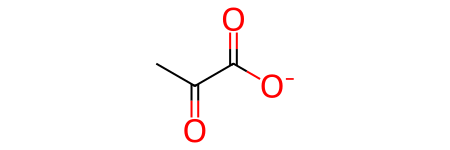

In [17]:
mol = Chem.MolFromMolFile(Path(cfg.raw_data) / "mcsa" / "mols" / "15361.mol", removeHs=False)
print(mol.GetNumAtoms())
mol

In [40]:
rcts = ['OCC', 'O']
rule = "[C:1]-[C:2].[O:3]>>[C:1]-[C:2]-[O:3]"
rule2 = "[C:1]-[O:2].[C:3]>>[C:1]-[O:2]-[C:3]"
op = rdChemReactions.ReactionFromSmarts(rule)
op2 = rdChemReactions.ReactionFromSmarts(rule2)
rcts_mol = [Chem.MolFromSmiles(r) for r in rcts]

for i, rct in enumerate(rcts_mol):
    for atom in rct.GetAtoms():
        atom.SetIntProp("reactant_idx", i)

outputs = op.RunReactants(rcts_mol)
next_rcts = [outputs[0][0], Chem.MolFromSmiles("C")]

outputs2 = op2.RunReactants(next_rcts)

In [41]:
for mol in outputs[0]:
        for atom in mol.GetAtoms():
            print(atom.GetIdx(), atom.GetAtomicNum(), atom.GetAtomMapNum(), atom.GetPropsAsDict())

for out in outputs2:
    for mol in out:
        for atom in mol.GetAtoms():
            print(atom.GetIdx(), atom.GetPropsAsDict())

0 6 0 {'old_mapno': 1, 'react_atom_idx': 1}
1 6 0 {'_ReactionDegreeChanged': 1, 'old_mapno': 2, 'react_atom_idx': 2}
2 8 0 {'_ReactionDegreeChanged': 1, 'old_mapno': 3, 'react_atom_idx': 0}
3 8 0 {'__computedProps': <rdkit.rdBase._vectSs object at 0x7fc76cdb8940>, '_CIPRank': 2, 'reactant_idx': 0, 'react_atom_idx': 0}
0 {'old_mapno': 1, 'react_atom_idx': 0}
1 {'_ReactionDegreeChanged': 1, 'old_mapno': 2, 'react_atom_idx': 3}
2 {'_ReactionDegreeChanged': 1, 'old_mapno': 3, 'react_atom_idx': 0}
3 {'_ReactionDegreeChanged': 1, 'old_mapno': 2, 'react_atom_idx': 1}
4 {'_ReactionDegreeChanged': 1, 'old_mapno': 3, 'react_atom_idx': 2}
0 {'old_mapno': 1, 'react_atom_idx': 1}
1 {'_ReactionDegreeChanged': 1, 'old_mapno': 2, 'react_atom_idx': 2}
2 {'_ReactionDegreeChanged': 1, 'old_mapno': 3, 'react_atom_idx': 0}
3 {'old_mapno': 1, 'react_atom_idx': 0}
4 {'__computedProps': <rdkit.rdBase._vectSs object at 0x7fc76cdb8940>, '_CIPRank': 2, 'reactant_idx': 0, 'react_atom_idx': 3}


In [37]:
rcts = ['CC=O']
rule = "[C:1]-[C:2]=[O:3]>>[C:1]-[C:2]-[O:3]"
op = rdChemReactions.ReactionFromSmarts(rule)
rcts_mol = [Chem.MolFromSmiles(r) for r in rcts]

for i, rct in enumerate(rcts_mol):
    for atom in rct.GetAtoms():
        atom.SetIntProp("reactant_idx", i)

outputs = op.RunReactants(rcts_mol)

for mol in outputs[0]:
        for atom in mol.GetAtoms():
            print(atom.GetIdx(), atom.GetAtomicNum(), atom.GetPropsAsDict())

0 6 {'old_mapno': 1, 'react_atom_idx': 0}
1 6 {'old_mapno': 2, 'react_atom_idx': 1}
2 8 {'old_mapno': 3, 'react_atom_idx': 2}


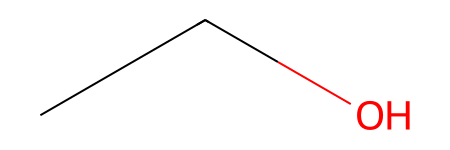

In [39]:
outputs[0][0]